# CLUSTERING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/tabrezkhan/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
#check for null values 
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

THERE ARE NO NULL VALUES SO DATA CAN BE PROCCESSED

# Data Cleaning

In [5]:
# let us delete TOTAL IPC CRIMES  column and recalculate it after redefining our data types
df.drop('TOTAL IPC CRIMES' ,axis = 1 , inplace=True)

In [6]:
df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

we notice calculated total crimes in each district for every which we do not need as we need to define the cluster of every district so we will delete rows with index total

In [7]:
#clean unnecessary data
df = df.drop(list(df[df['DISTRICT'] == 'TOTAL'].index))
df = df.drop(list(df[df['DISTRICT'] == 'DELHI UT TOTAL'].index))

In [8]:
df.shape

(8597, 32)

we dropped unuseful data

# Merging Dataset Columns
## we will merge types of crimes based on their definition and classification in Indian Penal Code to get more effective keys for districts clustering

##### Murder crimes in india is considered by its general form of attempts or real committment either ensuured cases or culpable so we will define all murder cases and attempts under the umbrella of murder cases

In [9]:
df['murder cases'] = df['MURDER'] + df['ATTEMPT TO MURDER'] +df['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']

In [10]:
df.drop(['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'] ,axis =1 , inplace = True)

#### Rape cases contains generally all forms of domestic and custodial cases so we will consider all records of rapes as reported cases 

In [11]:
df['rape cases'] = df['RAPE'] + df['CUSTODIAL RAPE']+df['OTHER RAPE']

In [12]:
df.drop(['RAPE', 'CUSTODIAL RAPE','OTHER RAPE'],axis=1 , inplace=True)

#### The vast majority of kidnapping and abduction cases in India are committed against women and girls in all its forms even auto or as mafias so all data we have will be defined as kidnapping and abduction cases as generally 

In [13]:
df['kidnapping and abduction'] = df[['KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS']].sum(axis=1)

In [14]:
df.drop(['KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS'] , axis=1 , inplace = True)

#### Theft, Robbery ,Burglary and Dacoity are offences in criminal law affecting the property of a person with or without any consent with the intent of committing a crime inside or taking over the property , defined in Sections 378 to 402 of the Indian Penal Code so we will consider all of them as theft cases in analysing the severity of security in districts of the country

In [15]:
df['theft cases'] = df[['DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT']].sum(axis=1)

In [16]:
df.drop(['DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT'], axis=1 , inplace=True)

#### In Indian Penal Code Riots are whenever an unlawful assembly uses force or violence to achieve the common purpose including burning and destroying public and private properties , every member of the assembly is guilty of rioting so we will consider arson included with recorded riot cases in states of india

In [17]:
df['riot cases'] = df['RIOTS'] + df['ARSON']

In [18]:
df.drop(['RIOTS','ARSON'] , axis=1 , inplace=True)

#### cheating crimes in Indian Penal Code in  Section 417, 418, 419 & 420  are defined as any form of in order to gain profit or an advantage from another person by using some deceitful means so we will merge columns of criminal breach of trust , cheating and counterfieting as cheating crimes

In [19]:
df['cheating cases'] = df[['CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING']].sum(axis = 1)

In [20]:
df.drop(['CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING'] , axis =1 , inplace = True)

#### married women in india are exposed to all forms of domestic beating even because of dowry or imposing outfit by masculine husbands so we define all violence of doawry , insult to modesty and domestic cruelt as crimes against women

In [21]:
df['married women victims'] = df[['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES']].sum(axis = 1)

In [22]:
df.drop(['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES'],axis=1 , inplace=True)

In [23]:
df

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims
0,ANDHRA PRADESH,ADILABAD,2001,1131,0,181,1518,178,100,92,646,108,121,374
1,ANDHRA PRADESH,ANANTAPUR,2001,1543,0,270,754,277,46,106,947,237,84,303
2,ANDHRA PRADESH,CHITTOOR,2001,2088,0,404,1262,160,54,118,1701,194,251,395
3,ANDHRA PRADESH,CUDDAPAH,2001,795,0,233,1181,134,40,50,449,187,51,238
4,ANDHRA PRADESH,EAST GODAVARI,2001,1244,0,431,2313,150,46,98,2508,111,273,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,0,0,1,1,0,0,0,0,4,0
9011,DELHI UT,WEST,2012,227,0,292,1144,99,158,908,4948,23,240,404
9012,LAKSHADWEEP,LAKSHADWEEP,2012,3,0,0,32,0,0,0,17,13,0,2
9014,PUDUCHERRY,KARAIKAL,2012,186,0,44,392,13,12,4,187,18,17,3


In [24]:
df.columns[3:16]

Index(['HURT/GREVIOUS HURT', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases', 'riot cases',
       'cheating cases', 'married women victims'],
      dtype='object')

In [25]:
# get total crimes in each state
df['Total Crimes'] = df[df.columns[3:16]].sum(axis=1)

In [26]:
df

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,1131,0,181,1518,178,100,92,646,108,121,374,4449
1,ANDHRA PRADESH,ANANTAPUR,2001,1543,0,270,754,277,46,106,947,237,84,303,4567
2,ANDHRA PRADESH,CHITTOOR,2001,2088,0,404,1262,160,54,118,1701,194,251,395,6627
3,ANDHRA PRADESH,CUDDAPAH,2001,795,0,233,1181,134,40,50,449,187,51,238,3358
4,ANDHRA PRADESH,EAST GODAVARI,2001,1244,0,431,2313,150,46,98,2508,111,273,426,7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,0,0,1,1,0,0,0,0,4,0,6
9011,DELHI UT,WEST,2012,227,0,292,1144,99,158,908,4948,23,240,404,8443
9012,LAKSHADWEEP,LAKSHADWEEP,2012,3,0,0,32,0,0,0,17,13,0,2,67
9014,PUDUCHERRY,KARAIKAL,2012,186,0,44,392,13,12,4,187,18,17,3,876


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8597 entries, 0 to 9015
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   STATE/UT                                     8597 non-null   object
 1   DISTRICT                                     8597 non-null   object
 2   YEAR                                         8597 non-null   int64 
 3   HURT/GREVIOUS HURT                           8597 non-null   int64 
 4   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  8597 non-null   int64 
 5   CAUSING DEATH BY NEGLIGENCE                  8597 non-null   int64 
 6   OTHER IPC CRIMES                             8597 non-null   int64 
 7   murder cases                                 8597 non-null   int64 
 8   rape cases                                   8597 non-null   int64 
 9   kidnapping and abduction                     8597 non-null   int64 
 10  theft cases 

### Top  state with crimes in the last decade 

In [28]:
df[df['Total Crimes'] == df['Total Crimes'].max()]

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
7044,MAHARASHTRA,MUMBAI COMMR.,2010,4487,0,690,7093,405,388,388,29936,413,2769,946,47515


##### State MAHARASHTRA is the most dangerous state in india in the last decade

# State Analysis Total crimes

In [29]:
df.groupby('STATE/UT')['Total Crimes'].sum().sort_values(ascending = False).reset_index()

,STATE/UT,Total Crimes
0,MAHARASHTRA,2863330
1,MADHYA PRADESH,2725675
2,ANDHRA PRADESH,2340889
3,TAMIL NADU,2267591
4,UTTAR PRADESH,2248445
5,RAJASTHAN,2135415
6,KARNATAKA,1696226
7,GUJARAT,1618477
8,BIHAR,1550009
9,KERALA,1510150


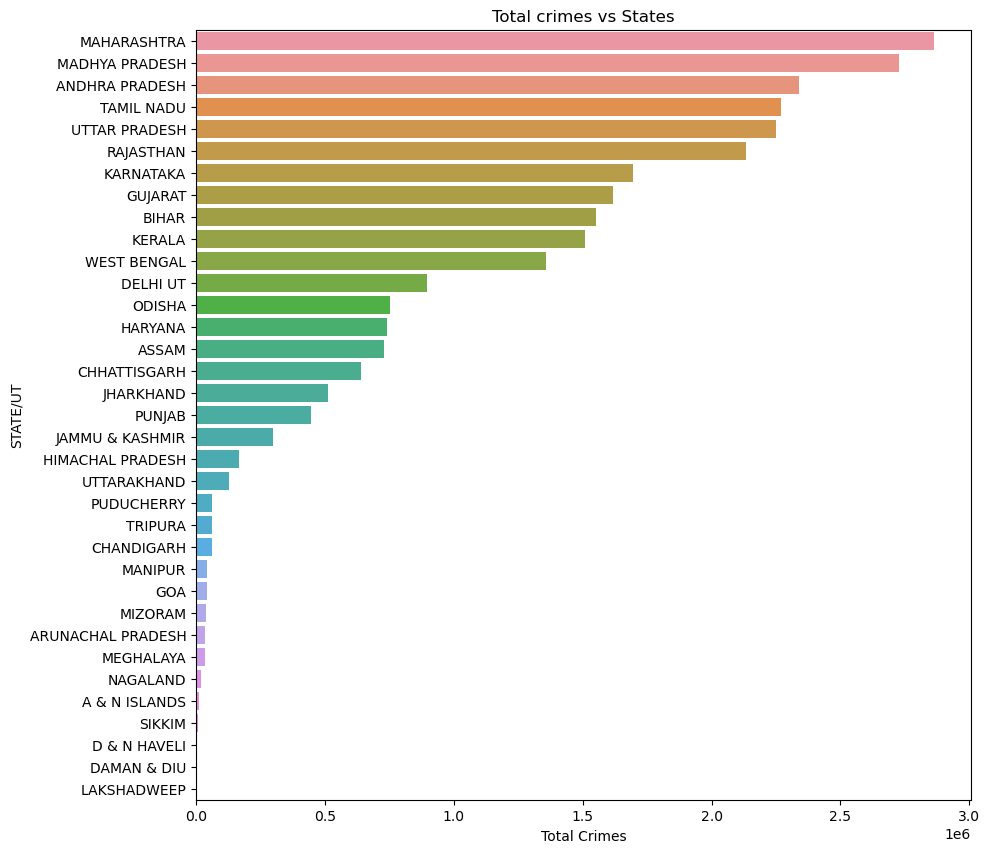

In [30]:
dt = df.groupby('STATE/UT')['Total Crimes'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,10))
sns.barplot(x=dt['Total Crimes'] , y=dt['STATE/UT'])
plt.title('Total crimes vs States')
plt.show()

#### State MAHARASHTRA is the most dangerous state in india in the last decade while LAKSHADWEEP is the safest state

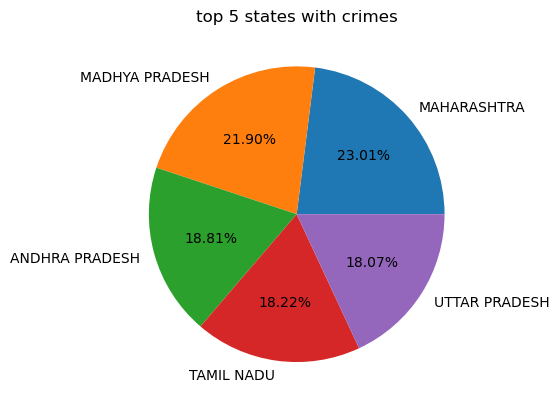

In [31]:
dt = df.groupby('STATE/UT')['Total Crimes'].sum().sort_values(ascending = False).reset_index()[:5]
plt.pie(x = dt['Total Crimes'] , labels = dt['STATE/UT'].unique() , autopct = '%0.2f%%' , data = dt)
plt.title('top 5 states with crimes')
plt.show()

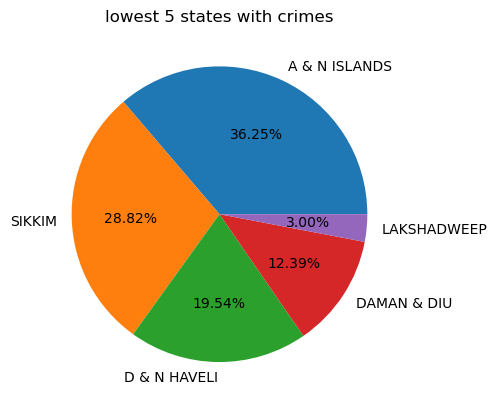

In [32]:
dt = df.groupby('STATE/UT')['Total Crimes'].sum().sort_values(ascending = False).reset_index()[-5:]
plt.pie(x = dt['Total Crimes'] , labels = dt['STATE/UT'].unique() , autopct = '%0.2f%%' , data = dt)
plt.title('lowest 5 states with crimes')
plt.show()

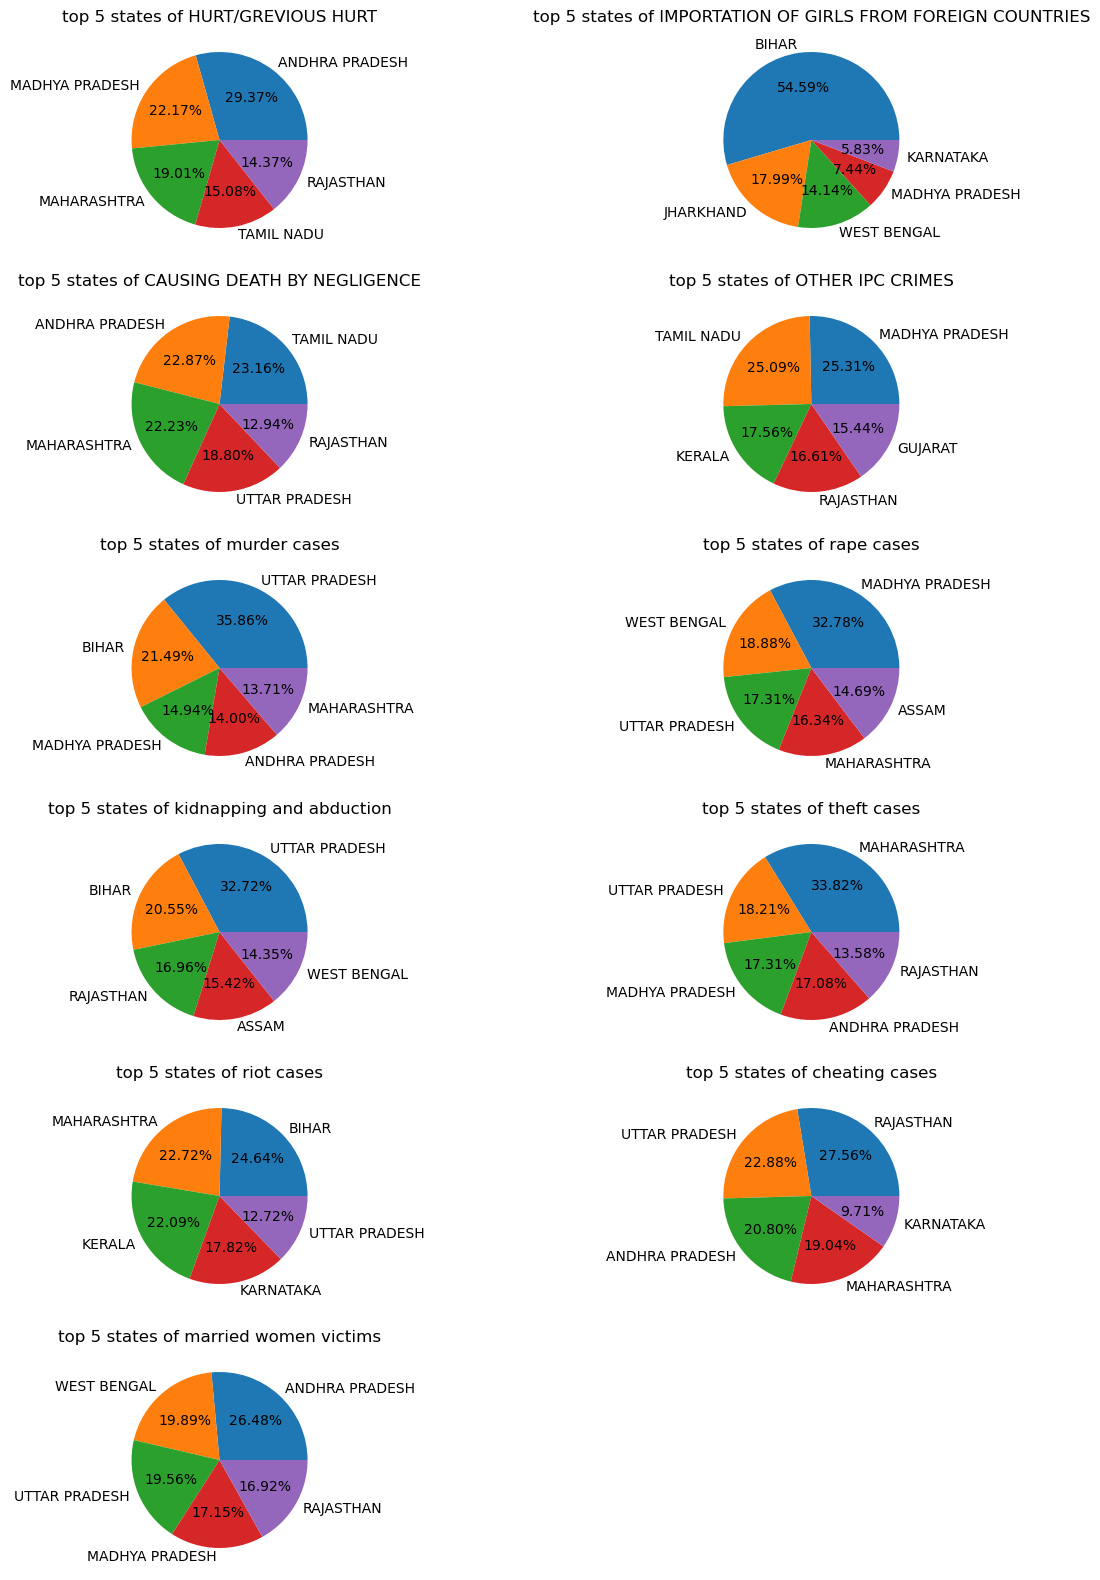

In [33]:
plt.figure(figsize=(14,20))
plot = 1
cols = ['HURT/GREVIOUS HURT',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases', 'riot cases',
       'cheating cases', 'married women victims']

for i in cols :
    if plot <= 11:
        ax = plt.subplot(6,2,plot)
        dt = df.groupby('STATE/UT')[i].sum().sort_values(ascending = False).reset_index()[:5]
        plt.pie(x = dt[i] , labels = dt['STATE/UT'].unique() , autopct = '%0.2f%%' , data = dt)
        plt.title('top 5 states of {}'.format(i))
    plot +=1
plt.show()    

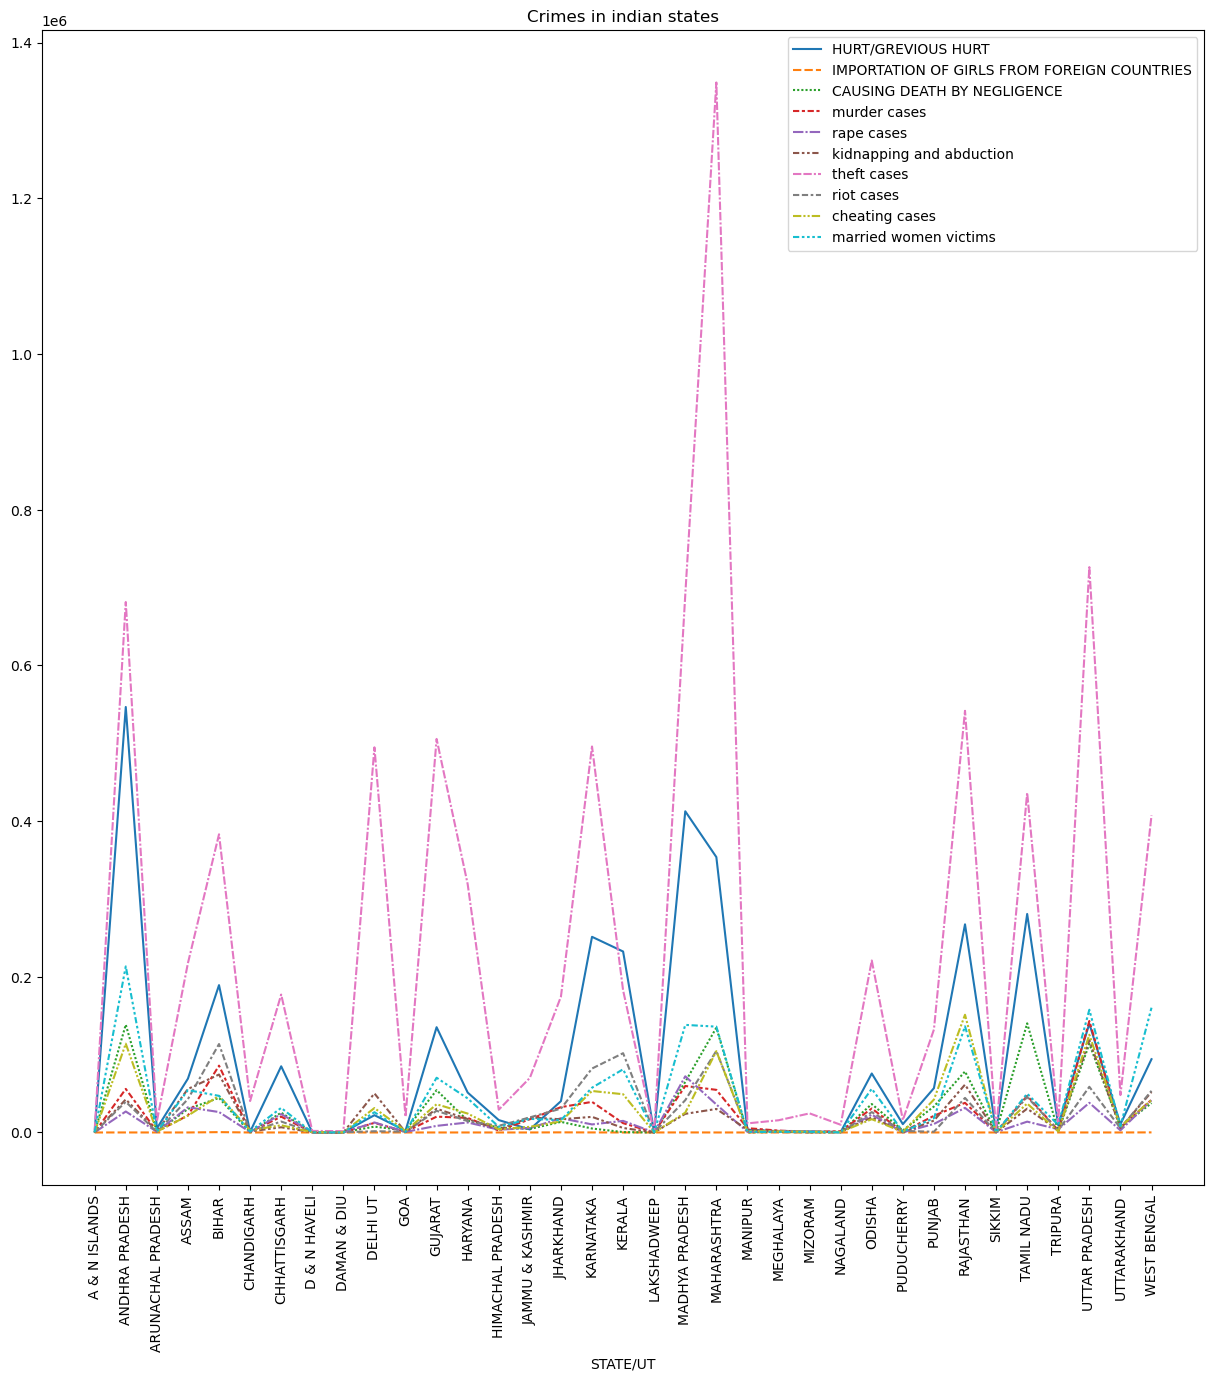

In [34]:
plt.figure(figsize=(15,15))
dt = df.groupby('STATE/UT')[['HURT/GREVIOUS HURT',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases', 'riot cases',
       'cheating cases', 'married women victims']].sum()
sns.lineplot(data =dt)
plt.title('Crimes in indian states')
plt.xticks(rotation = 90)
plt.show()

#### Theft crimes are the highest types of crimes that happened in one state as it happened in the most recorded cases in state MAHARASHTRA 

In [35]:
prop = df[['HURT/GREVIOUS HURT',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases', 'riot cases',
       'cheating cases', 'married women victims']].sum()
prop

HURT/GREVIOUS HURT                             3371876
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES        892
CAUSING DEATH BY NEGLIGENCE                    1001864
murder cases                                    799134
rape cases                                      478274
kidnapping and abduction                        713714
theft cases                                    8458016
riot cases                                      888631
cheating cases                                  978336
married women victims                          1543612
dtype: int64

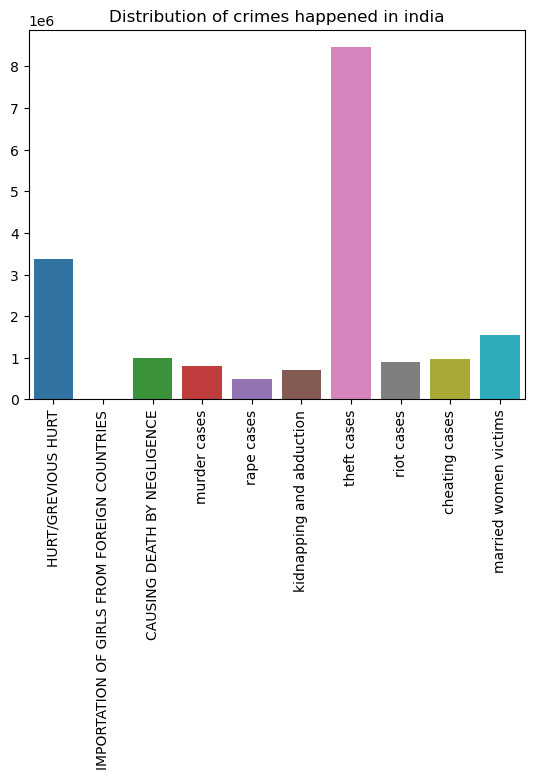

In [36]:
sns.barplot(x=prop.index , y=prop.values)
plt.title('Distribution of crimes happened in india')
plt.xticks(rotation = 90)
plt.show()

####  Theft cases crimes are the most  happened in indian states while girls trafficking are the least

# years vs total crimes

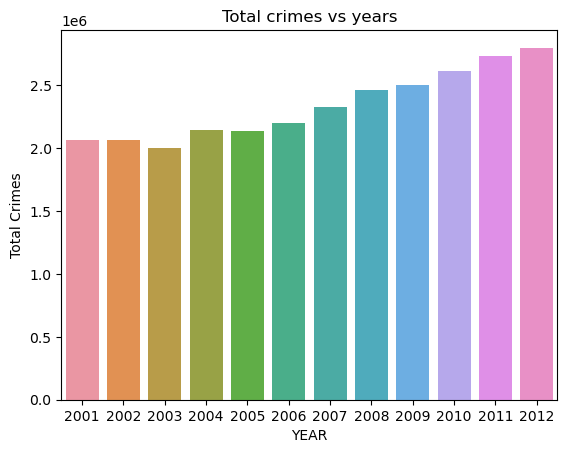

In [37]:
dt = df.groupby('YEAR')['Total Crimes'].sum().sort_values(ascending = False).reset_index()
sns.barplot(y=dt['Total Crimes'] , x=dt['YEAR'])
plt.title('Total crimes vs years')
plt.show()

#### Year 2012 witnessed the highest number of crimes in india while 2003 was the lowest

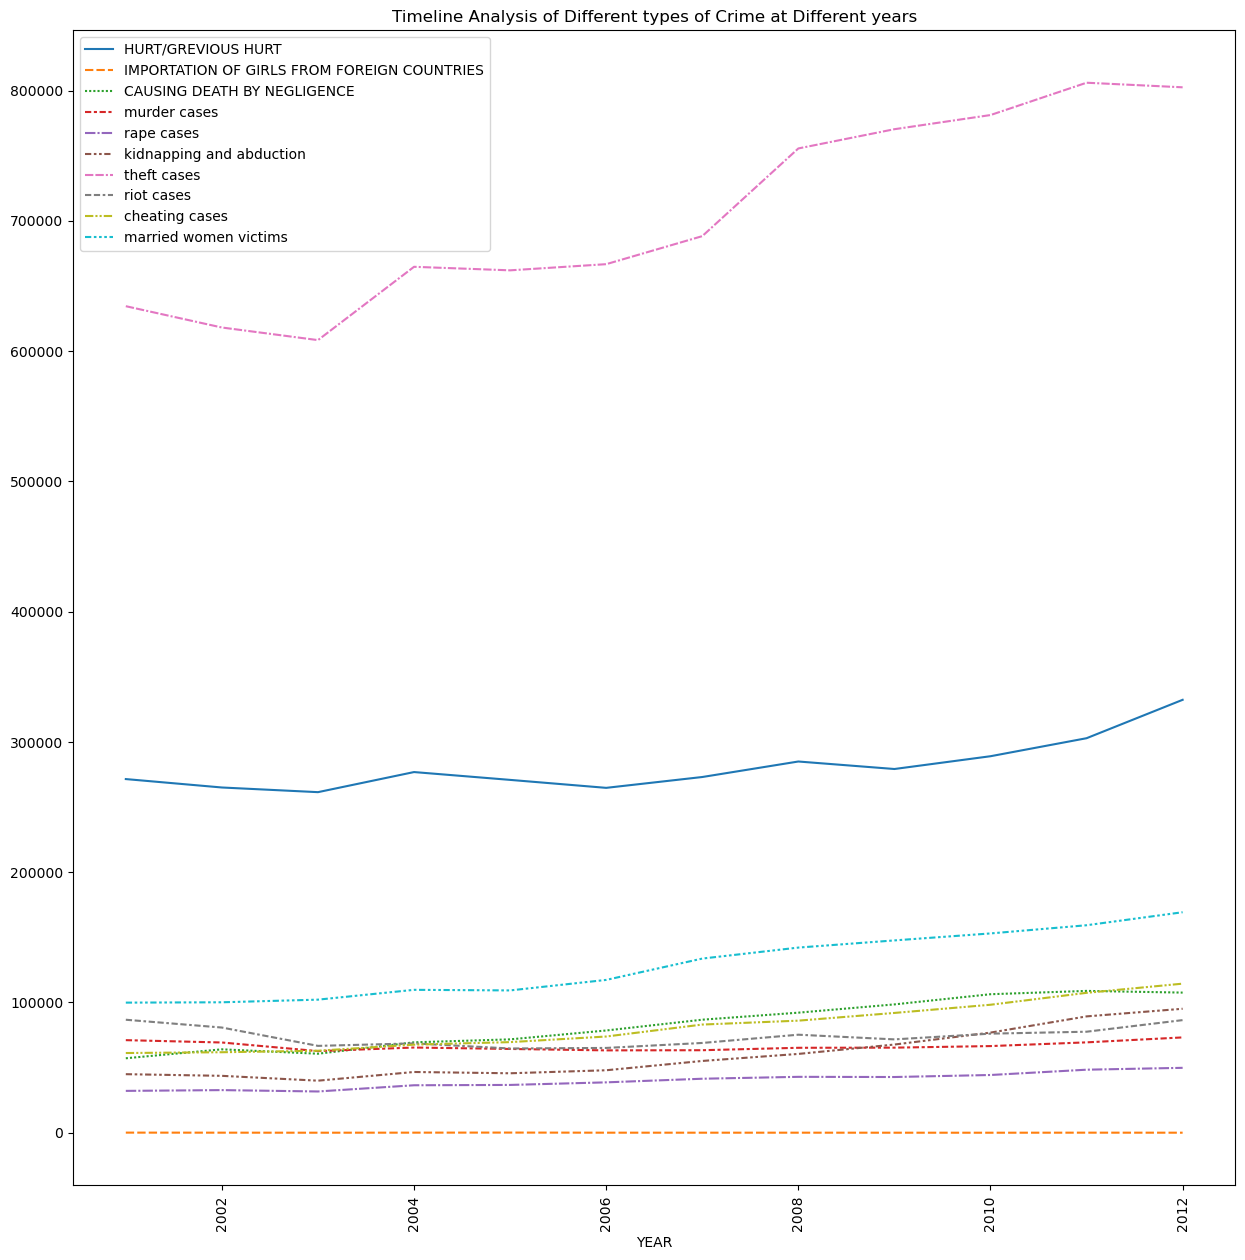

In [38]:
plt.figure(figsize=(15,15))
dt = df.groupby('YEAR')[['HURT/GREVIOUS HURT',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases', 'riot cases',
       'cheating cases', 'married women victims']].sum()
sns.lineplot(data =dt)
plt.title('Timeline Analysis of Different types of Crime at Different years')
plt.xticks(rotation = 90)
plt.show()

#### Theft cases crimes are the most happened in indian states while girls trafficking are the least

# Clustering Of Districts
## We will use Unsupervised ML (Clustering) to cluster the sensivity of Districts in whole India according to recorded cases of sensitive types of crimes that happened in these districts 


# 4.1  Create 3 clusters 

## K Means

In [39]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### we need to cluster the districts based on three types of areas sensitive , moderate and peaceful so we will use 3 clusters in performing our mean

In [40]:
x = df[['HURT/GREVIOUS HURT' ,'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases','married women victims']]

X_scaled = scaler.fit_transform(x)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.fit_predict(x)

In [41]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

# sample prediction

In [42]:
df.iloc[8000]

STATE/UT                                             GUJARAT
DISTRICT                                       RAJKOT COMMR.
YEAR                                                    2012
HURT/GREVIOUS HURT                                       336
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES                0
CAUSING DEATH BY NEGLIGENCE                              139
OTHER IPC CRIMES                                        1930
murder cases                                              72
rape cases                                                22
kidnapping and abduction                                 132
theft cases                                             2281
riot cases                                                82
cheating cases                                           138
married women victims                                    277
Total Crimes                                            5409
Name: 8391, dtype: object

In [43]:
test = kmeans.predict(np.asarray([[336,72,22,132,2281,277]])) # test if the values are having clusters
test

array([0])

In [44]:
df.iloc[7000]

STATE/UT                                       UTTAR PRADESH
DISTRICT                                               UNNAO
YEAR                                                    2010
HURT/GREVIOUS HURT                                       197
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES                0
CAUSING DEATH BY NEGLIGENCE                              286
OTHER IPC CRIMES                                         380
murder cases                                             128
rape cases                                                64
kidnapping and abduction                                 162
theft cases                                              332
riot cases                                                37
cheating cases                                           133
married women victims                                    157
Total Crimes                                            1876
Name: 7340, dtype: object

In [45]:
test = kmeans.predict(np.asarray([[197,128,64,162,332,157]])) # test if the values are having clusters
test

array([0])

# 4.2  Create DataFrame for each cluster that shows data according to the areas

In [46]:
sensitive_areas = df[y_kmeans==2]
sensitive_areas 

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
255,KARNATAKA,BANGALORE COMMR.,2001,3735,0,38,11106,553,80,304,15034,301,2045,543,33739
370,MAHARASHTRA,MUMBAI,2001,3845,0,709,6095,501,254,296,26538,202,1833,534,40807
972,KARNATAKA,BANGALORE COMMR.,2002,4029,0,45,11801,516,64,318,16685,285,2075,574,36392
1087,MAHARASHTRA,MUMBAI,2002,3542,0,753,5950,393,256,238,23310,148,1573,526,36689
1443,ANDHRA PRADESH,HYDERABAD CITY,2003,4595,0,489,1980,261,114,310,15133,299,2272,1585,27038
1695,KARNATAKA,BANGALORE COMMR.,2003,3847,0,84,12547,497,68,264,16362,273,2108,499,36549
1816,MAHARASHTRA,MUMBAI,2003,3562,0,632,5865,365,266,300,22458,138,1643,533,35762
2423,KARNATAKA,BANGALORE COMMR.,2004,3542,0,104,11008,501,64,350,18921,326,1701,457,36974
2544,MAHARASHTRA,MUMBAI,2004,3702,0,735,6451,384,374,356,26410,223,2033,660,41328
3157,KARNATAKA,BANGALORE COMMR.,2005,3474,0,93,9869,529,76,262,21716,382,1895,532,38828


In [47]:
sensitive_districts = df['DISTRICT'][y_kmeans==2].unique()
sensitive_districts

array(['BANGALORE COMMR.', 'MUMBAI', 'HYDERABAD CITY', 'MUMBAI COMMR.',
       'AHMEDABAD COMMR.'], dtype=object)

In [48]:
moderate_areas = df[y_kmeans==1]
moderate_areas

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
6,ANDHRA PRADESH,GUNTUR,2001,1792,0,369,2426,272,108,164,2660,287,375,653,9106
7,ANDHRA PRADESH,HYDERABAD CITY,2001,3137,0,409,1512,231,74,160,6819,65,1418,915,14740
18,ANDHRA PRADESH,RANGA REDDY,2001,2829,7,593,2103,325,144,212,3773,132,597,626,11341
21,ANDHRA PRADESH,VIJAYAWADA,2001,1578,0,234,724,102,50,140,4635,36,658,728,8885
102,BIHAR,PATNA,2001,354,39,178,2825,1045,54,394,4098,560,539,289,10375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,DELHI UT,NORTH-WEST,2012,166,0,9,1253,105,128,714,4039,3,190,257,6864
9006,DELHI UT,OUTER,2012,224,0,90,2006,171,134,1144,4791,13,269,356,9198
9007,DELHI UT,SOUTH,2012,101,0,25,1651,61,140,490,4541,7,290,180,7486
9008,DELHI UT,SOUTH-EAST,2012,252,0,218,2004,121,232,1076,6061,23,262,337,10586


In [49]:
moderate_districts = df['DISTRICT'][y_kmeans==1].unique()
moderate_districts

array(['GUNTUR', 'HYDERABAD CITY', 'RANGA REDDY', 'VIJAYAWADA', 'PATNA',
       'RAIPUR', 'AHMEDABAD COMMR.', 'RAJKOT COMMR.', 'SURAT COMMR.',
       'ERNAKULAM', 'BHOPAL', 'GWALIOR', 'INDORE', 'UJJAIN',
       'MUMBAI RLY.', 'NAGPUR COMMR.', 'NAGPUR RURAL', 'PUNE COMMR.',
       'THANE COMMR.', 'JAIPUR', 'KOTA', 'CHENNAI', 'AGRA', 'G.R.P.',
       'GHAZIABAD', 'KANPUR NAGAR', 'LUCKNOW', 'MEERUT',
       '24 PARGANAS NORTH', 'KOLKATA', 'CHANDIGARH', 'CENTRAL', 'EAST',
       'NORTH', 'NORTH WEST', 'SOUTH', 'SOUTH WEST', 'WEST',
       'EAST GODAVARI', 'GUWAHATI CITY', 'TRIVANDRUM', 'JABALPUR',
       'CHENGAI', 'CYBERABAD', 'VADODARA COMMR.', 'KHURDA',
       'WEST GODAVARI', 'JODHPUR', 'COIMBATORE RURAL',
       '24 PARGANAS SOUTH', 'CHITTOOR', 'GURGAON', 'RANCHI', 'AKOLA',
       'YAVATMAL', 'NORTH-WEST', 'SOUTH-WEST', 'VIJAYAWADA CITY',
       'BHAVNAGAR', 'FARIDABAD', 'AHMEDNAGAR', 'NAVI MUMBAI',
       'JAIPUR EAST', 'VISAKHAPATNAM', 'ALWAR', 'JAIPUR SOUTH',
       'GAUTAMBUDH NAG

In [50]:
peaceful_areas = df[y_kmeans==0]
peaceful_areas

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,1131,0,181,1518,178,100,92,646,108,121,374,4449
1,ANDHRA PRADESH,ANANTAPUR,2001,1543,0,270,754,277,46,106,947,237,84,303,4567
2,ANDHRA PRADESH,CHITTOOR,2001,2088,0,404,1262,160,54,118,1701,194,251,395,6627
3,ANDHRA PRADESH,CUDDAPAH,2001,795,0,233,1181,134,40,50,449,187,51,238,3358
4,ANDHRA PRADESH,EAST GODAVARI,2001,1244,0,431,2313,150,46,98,2508,111,273,426,7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,DELHI UT,SOUTH-WEST,2012,131,0,4,1387,101,174,798,2601,12,219,315,5742
9010,DELHI UT,STF,2012,0,0,0,1,1,0,0,0,0,4,0,6
9012,LAKSHADWEEP,LAKSHADWEEP,2012,3,0,0,32,0,0,0,17,13,0,2,67
9014,PUDUCHERRY,KARAIKAL,2012,186,0,44,392,13,12,4,187,18,17,3,876


In [51]:
peaceful_districts = df['DISTRICT'][y_kmeans==0].unique()
peaceful_districts 

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL',
       'MAHABOOBNAGAR', 'MEDAK', 'NALGONDA', 'NELLORE', 'NIZAMABAD',
       'PRAKASHAM', 'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',
       'ARARIA', 'ARWAL', 'AURANGABAD', 'BAGAHA', 'BANKA', 'BEGUS

# 4.3 Analyze Clustering

In [52]:
kmeans.cluster_centers_

array([[  344.6604524 ,    84.52485707,    50.37981606,    68.89013174,
          659.97849863,   152.39510316],
       [  968.13333333,   203.91809524,   127.75238095,   282.8       ,
         4871.74857143,   565.8552381 ],
       [ 3479.53846154,   461.15384615,   224.92307692,   421.30769231,
        22698.5       ,   783.34615385]])

In [53]:
kmeans.cluster_centers_[:,0]  # [: , 0] #cluster centers of HURT/GREVIOUS HURT

array([ 344.6604524 ,  968.13333333, 3479.53846154])

In [54]:
kmeans.cluster_centers_[:,5]   # married women victims

array([152.39510316, 565.8552381 , 783.34615385])

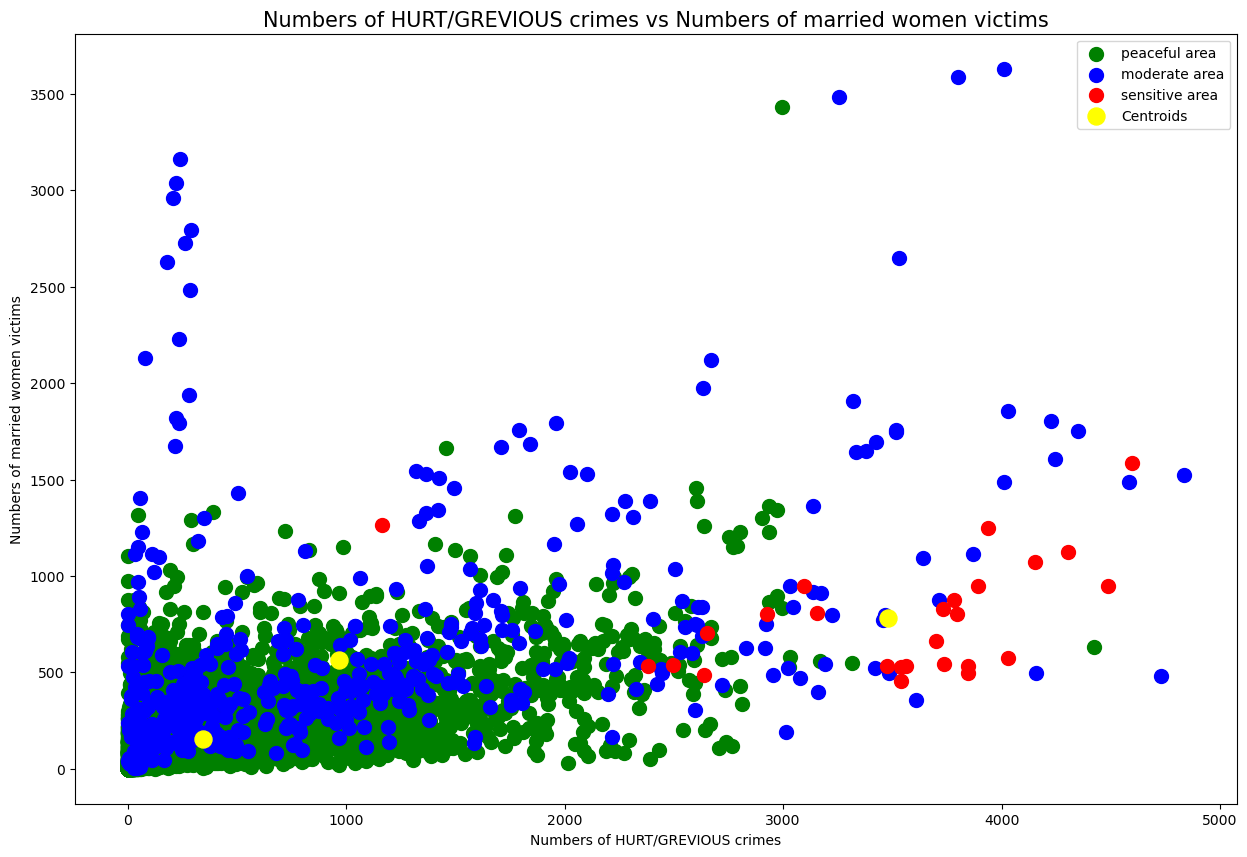

In [55]:
plt.figure(figsize=(15,10))

plt.scatter( x[y_kmeans==0]['HURT/GREVIOUS HURT'] , x[y_kmeans==0]['married women victims'] ,s=100 , c='green' , label='peaceful area')

plt.scatter( x[y_kmeans==1]['HURT/GREVIOUS HURT'] , x[y_kmeans==1]['married women victims'] ,s=100 , c='blue' , label='moderate area')

plt.scatter( x[y_kmeans==2]['HURT/GREVIOUS HURT'] , x[y_kmeans==2]['married women victims'] ,s=100 , c='red' , label='sensitive area')


plt.scatter( kmeans.cluster_centers_[:,0]  , kmeans.cluster_centers_[:,5] , s=150 , c='yellow' , label= 'Centroids'  )

plt.title('Numbers of HURT/GREVIOUS crimes vs Numbers of married women victims' , fontsize=15)
plt.xlabel('Numbers of HURT/GREVIOUS crimes')
plt.ylabel('Numbers of married women victims')
plt.legend()
plt.show()

#### we see that  there is a positive correlation between numbers of Hurt and Grevious crimes that happened in most of sensitive areas  and numbers of married women victims as the majority of easily targeted victims of any place or any types of crimes are always women and children so the more intendencies to bodily harm  serious injuries or disfiguries  , the more the weaker victim will be exposed to this crime under the pressure of society.The tendencies to physical violence is usually outraged because of poor social and economical conditions that leads to criminality and severe domestice violence and the victims always are women and children

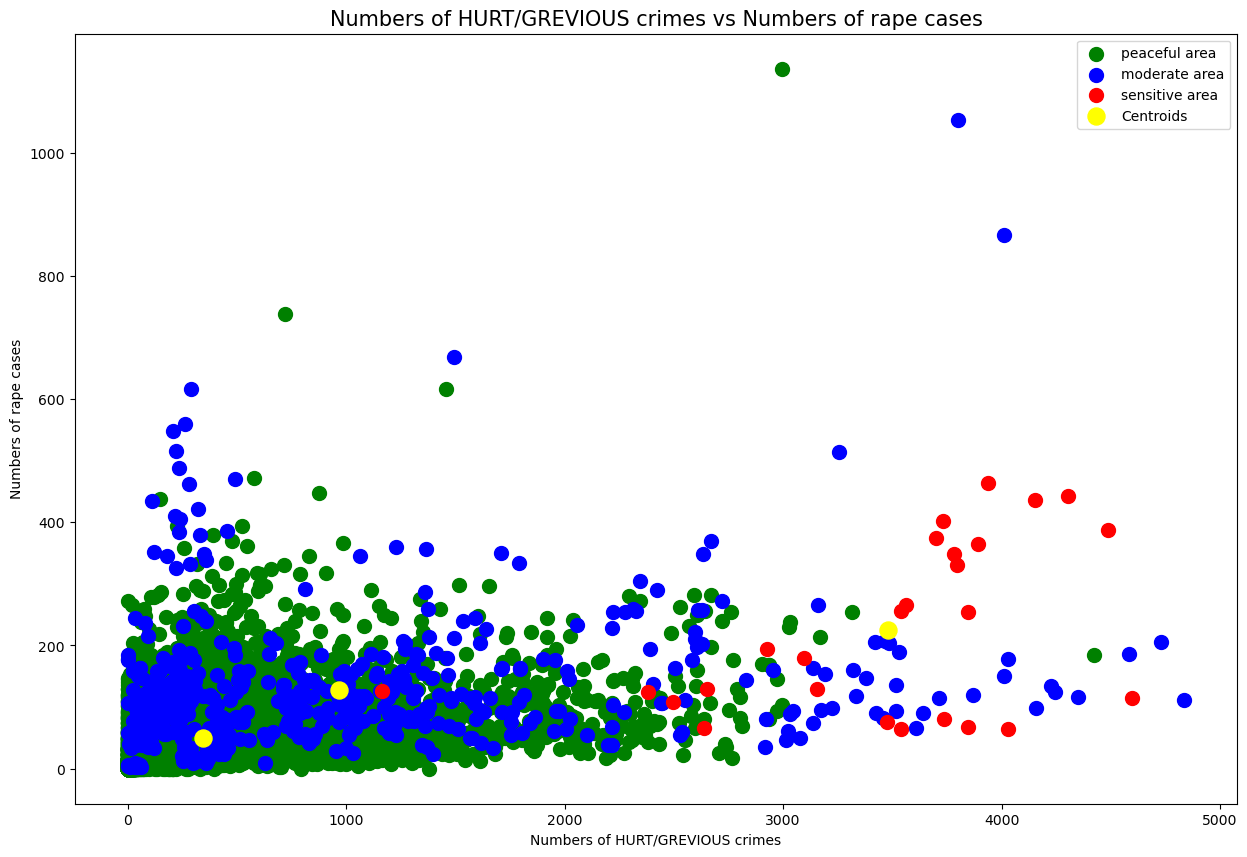

In [56]:
plt.figure(figsize=(15,10))

plt.scatter( x[y_kmeans==0]['HURT/GREVIOUS HURT'] , x[y_kmeans==0]['rape cases'] ,s=100 , c='green' , label='peaceful area')

plt.scatter( x[y_kmeans==1]['HURT/GREVIOUS HURT'] , x[y_kmeans==1]['rape cases'] ,s=100 , c='blue' , label='moderate area')

plt.scatter( x[y_kmeans==2]['HURT/GREVIOUS HURT'] , x[y_kmeans==2]['rape cases'] ,s=100 , c='red' , label='sensitive area')

plt.scatter( kmeans.cluster_centers_[:,0]  , kmeans.cluster_centers_[:,2] , s=150 , c='yellow' , label= 'Centroids'  )

plt.title('Numbers of HURT/GREVIOUS crimes vs Numbers of rape cases' , fontsize=15)
plt.xlabel('Numbers of HURT/GREVIOUS crimes')
plt.ylabel('Numbers of rape cases')
plt.legend()
plt.show()

#### There is a positive correlation beetween HURT and GREVIOUS crimes and Rape crimes as the vast majority of casualties are women and according to the graph most of sensitive areas who recorded at least 3000 Hurt crimes in  a decade especially Voluntarily throwing or attempting to throw acid witnessed an increasing positively in reported cases of rape and custodial rape which indicates for a real serious nmination problem of security for women in the countrywide along the last decade and that is because of the lack of efficiency of police that neglecting most of cases or arrive late in addition , the law is not effective in confronting this case as For the purposes of section 326A in Indian Penal case is only 10 years of life which can be manipulated in the courts and only be fined so the detterence is not sufficient or applied and that is the main challenge for the government and police as the massive populatin is a key component in the disability of applying law

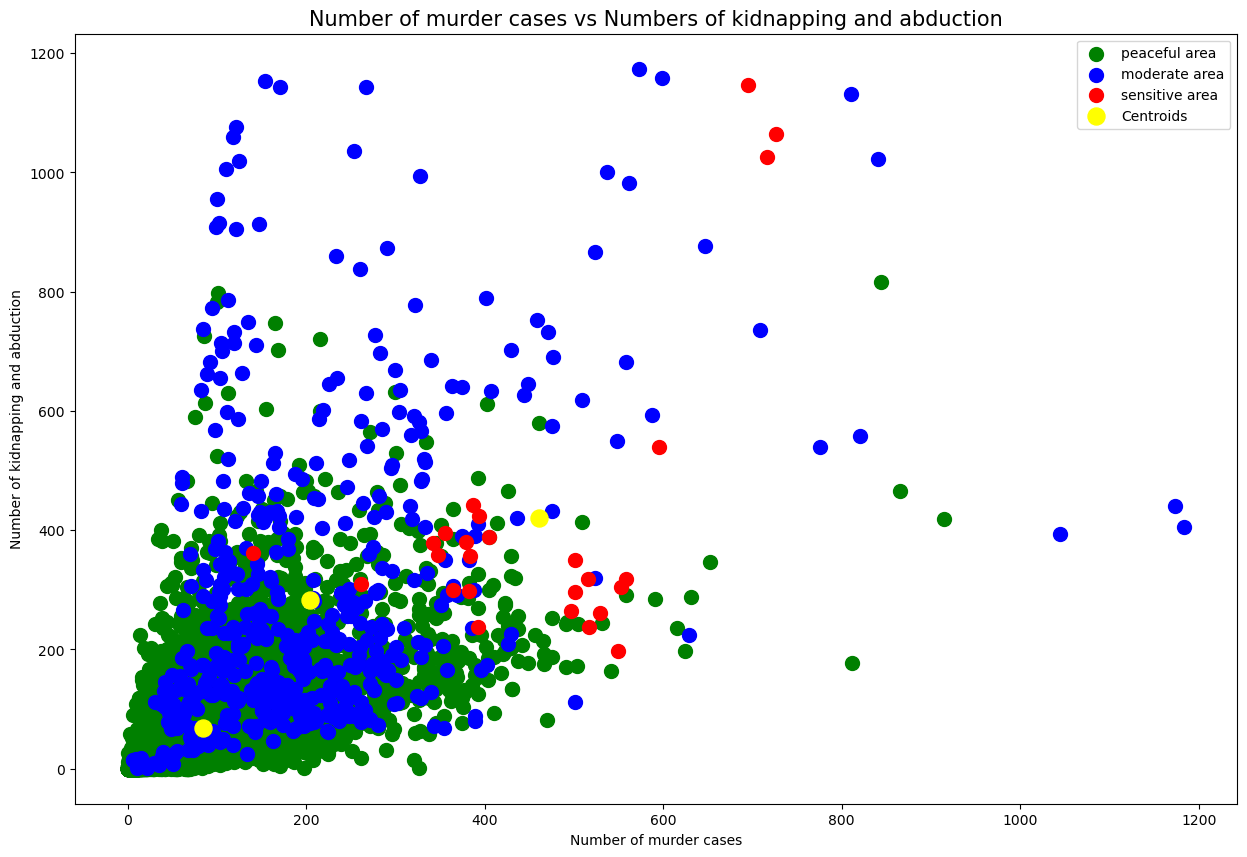

In [57]:
plt.figure(figsize=(15,10))

plt.scatter( x[y_kmeans==0]['murder cases'] , x[y_kmeans==0]['kidnapping and abduction'] ,s=100 , c='green' , label='peaceful area')

plt.scatter( x[y_kmeans==1]['murder cases'] , x[y_kmeans==1]['kidnapping and abduction'] ,s=100 , c='blue' , label='moderate area')

plt.scatter( x[y_kmeans==2]['murder cases'] , x[y_kmeans==2]['kidnapping and abduction'] ,s=100 , c='red' , label='sensitive area')

plt.scatter( kmeans.cluster_centers_[:,1]  , kmeans.cluster_centers_[:,3] , s=150 , c='yellow' , label= 'Centroids'  )

plt.title('Number of murder cases vs Numbers of kidnapping and abduction' , fontsize=15)
plt.xlabel('Number of murder cases')
plt.ylabel('Number of kidnapping and abduction')
plt.legend()
plt.show()

#### Most of sensitive and moderate areas in india recorded lower than 500 murder cases decadewise while we see a positive correlation  with crimes of kidnapping and abduction and murder as in most of time murder crimes are  accompanied with kidnapping crimes in India as kidnapping and abduction usually aimed at  infringe the basic right to life and liberty of a person for a pupose of harm which terminated by murder at most of cases and with the steady increase in the number of victims of these heinous crimes, the need to prevent the cases of kidnapping and abducting has become particularly important, especially when it is done for forced beggar, maiming, and sexual intercourse by confronting the trafficking of children and women among the legal frameworks, the government bodies, and the non-government bodies who are extremely important

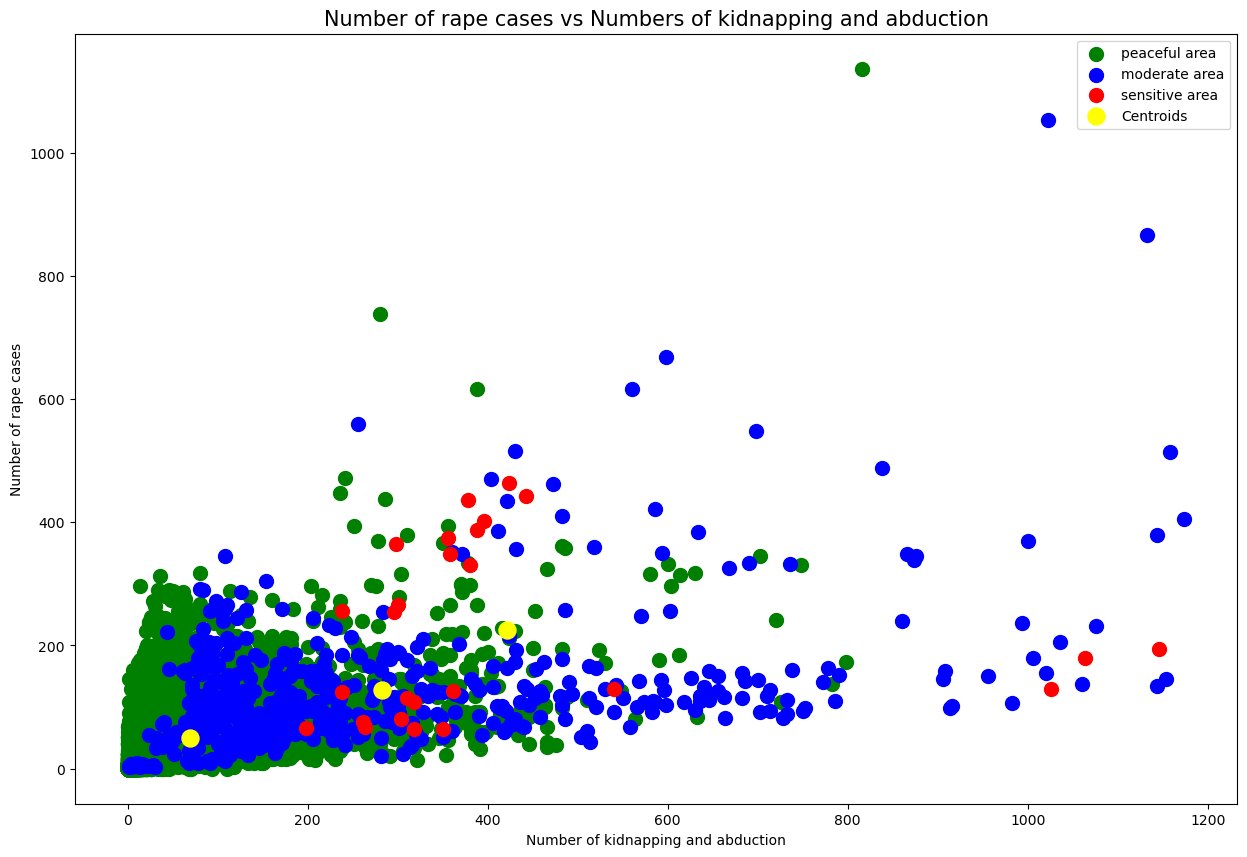

In [58]:
plt.figure(figsize=(15,10))

plt.scatter( x[y_kmeans==0]['kidnapping and abduction'] ,x[y_kmeans==0]['rape cases']  ,s=100 , c='green' , label='peaceful area')

plt.scatter( x[y_kmeans==1]['kidnapping and abduction'] ,x[y_kmeans==1]['rape cases'] ,s=100 , c='blue' , label='moderate area')

plt.scatter( x[y_kmeans==2]['kidnapping and abduction'] ,x[y_kmeans==2]['rape cases'] ,s=100 , c='red' , label='sensitive area')

plt.scatter( kmeans.cluster_centers_[:,3]  , kmeans.cluster_centers_[:,2] , s=150 , c='yellow' , label= 'Centroids'  )

plt.title('Number of rape cases vs Numbers of kidnapping and abduction' , fontsize=15)
plt.ylabel('Number of rape cases')
plt.xlabel('Number of kidnapping and abduction')
plt.legend()
plt.show()

#### we notice that all areas in India are confronting the big issue of kidnapping and rape crimes as India is known as one of the most dangerous countries in the worl on women and that is due too the massive population and tough economic condition for the majority of populations which create severe tendencies to criminality and violence against weaker side who are always women and children and as we know in the graph above the more kidnapping cases are happening , the more rape crime especially custodial are committed which mean the strongest incentive for kidnapping and abduction crimes is sexual violence and intercourse so we conclude that Kidnapping , Abduction and rape crime are always intertwined against women and children especially and to battle this we must battling trafficking of children and women in addition , forced marriage by enhancing the ability of legal frameworks like police and courts in fighting mafia of traficking  and focus on investment in more education of the caonsequencies of these crimes on doemstic stability of family.

## Conclusion :

#### Kidnapping crimes are the most classified type of crimes in india as it is accompanied in most of its occurance by murder regrdless of intendies of kidnapping even it is for trafficking because we see above above numberr of kidnapping and abduction crimes are more positively correlated with murder crimes more than rape crimes which make these cases very dangerous and a serius threat and police is the important factor in stopping it sothe government must spend more investments in security sector parallel to investigation about mafias of trafficking and impose more restrictions on borders to face this phenomenon

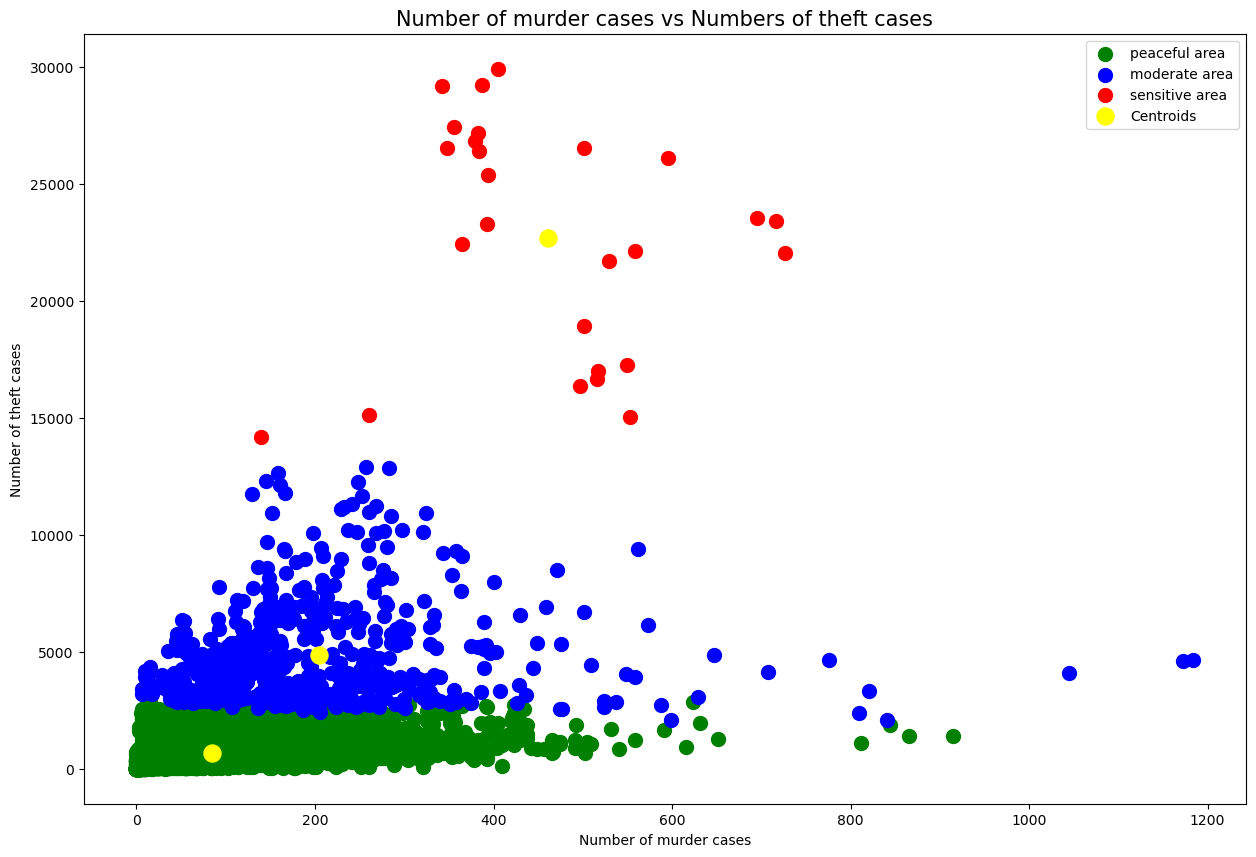

In [59]:
plt.figure(figsize=(15,10))

plt.scatter( x[y_kmeans==0]['murder cases'] , x[y_kmeans==0]['theft cases'] ,s=100 , c='green' , label='peaceful area')

plt.scatter( x[y_kmeans==1]['murder cases'] , x[y_kmeans==1]['theft cases'] ,s=100 , c='blue' , label='moderate area')

plt.scatter( x[y_kmeans==2]['murder cases'] , x[y_kmeans==2]['theft cases'] ,s=100 , c='red' , label='sensitive area')

plt.scatter( kmeans.cluster_centers_[:,1]  , kmeans.cluster_centers_[:,4] , s=150 , c='yellow' , label= 'Centroids'  )

plt.title('Number of murder cases vs Numbers of theft cases' , fontsize=15)
plt.xlabel('Number of murder cases')
plt.ylabel('Number of theft cases')
plt.legend()
plt.show()

#### The highest numbers of murder cases and theft crimes happened in sensitive areas which have metro tunnels as it is known in India the majority of theft cases happened in metro like MAHARASHTRA and even more than 90 % of cases are not reported  because victims themselves refrained from approaching the police in certain cases or because the police did not register the case for various reasons and in both cases we can not ignore those high number of murder cases which indicates the high raise of criminality because of the effectiveness and proficiency of police so to confront this issue we recommend to raise the proficiency of police by training and funding well salaries and provide more checkpoints in general densily places and so we need to help to aware people of avoiding rush hours as possible as they can as the majority of victims complain about occurrence of theft in rush hours.
#### In addition , we see the raise of murder crimes in the last decade in sensitive areas very much more than the other states and that as we recommended to invest in improving the proficiency of police  
 

## The most unsafe district in india in the last decade

In [60]:
sensitive_areas 

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
255,KARNATAKA,BANGALORE COMMR.,2001,3735,0,38,11106,553,80,304,15034,301,2045,543,33739
370,MAHARASHTRA,MUMBAI,2001,3845,0,709,6095,501,254,296,26538,202,1833,534,40807
972,KARNATAKA,BANGALORE COMMR.,2002,4029,0,45,11801,516,64,318,16685,285,2075,574,36392
1087,MAHARASHTRA,MUMBAI,2002,3542,0,753,5950,393,256,238,23310,148,1573,526,36689
1443,ANDHRA PRADESH,HYDERABAD CITY,2003,4595,0,489,1980,261,114,310,15133,299,2272,1585,27038
1695,KARNATAKA,BANGALORE COMMR.,2003,3847,0,84,12547,497,68,264,16362,273,2108,499,36549
1816,MAHARASHTRA,MUMBAI,2003,3562,0,632,5865,365,266,300,22458,138,1643,533,35762
2423,KARNATAKA,BANGALORE COMMR.,2004,3542,0,104,11008,501,64,350,18921,326,1701,457,36974
2544,MAHARASHTRA,MUMBAI,2004,3702,0,735,6451,384,374,356,26410,223,2033,660,41328
3157,KARNATAKA,BANGALORE COMMR.,2005,3474,0,93,9869,529,76,262,21716,382,1895,532,38828


In [68]:
dt = sensitive_areas.groupby('DISTRICT')['Total Crimes'].sum().sort_values(ascending=False).reset_index()
dt

,DISTRICT,Total Crimes
0,BANGALORE COMMR.,459437
1,MUMBAI COMMR.,310755
2,MUMBAI,198320
3,AHMEDABAD COMMR.,27253
4,HYDERABAD CITY,27038


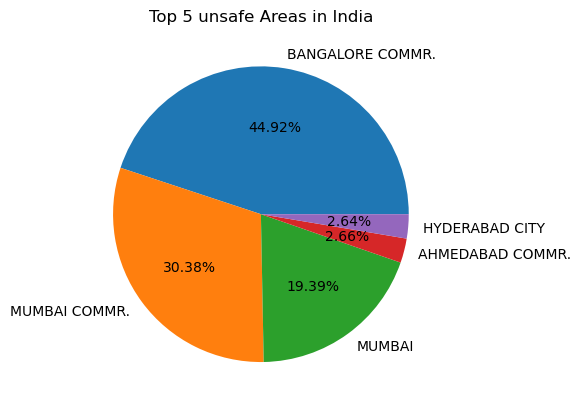

In [61]:
dt = sensitive_areas.groupby('DISTRICT')['Total Crimes'].sum().sort_values(ascending=False).reset_index()
plt.pie(x=dt['Total Crimes'] , labels = dt['DISTRICT'].unique() , autopct='%0.2f%%' , data=dt)
plt.title('Top 5 unsafe Areas in India')
plt.show()

#### BANGALORE COMMR in state KARNATAKA is the most unsafe district in india in the last decade

In [62]:
dt = sensitive_areas.loc[sensitive_areas['DISTRICT'] == 'BANGALORE COMMR.']
dt

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
255,KARNATAKA,BANGALORE COMMR.,2001,3735,0,38,11106,553,80,304,15034,301,2045,543,33739
972,KARNATAKA,BANGALORE COMMR.,2002,4029,0,45,11801,516,64,318,16685,285,2075,574,36392
1695,KARNATAKA,BANGALORE COMMR.,2003,3847,0,84,12547,497,68,264,16362,273,2108,499,36549
2423,KARNATAKA,BANGALORE COMMR.,2004,3542,0,104,11008,501,64,350,18921,326,1701,457,36974
3157,KARNATAKA,BANGALORE COMMR.,2005,3474,0,93,9869,529,76,262,21716,382,1895,532,38828
3891,KARNATAKA,BANGALORE COMMR.,2006,2640,0,113,9941,549,66,198,17262,715,1801,485,33770
4633,KARNATAKA,BANGALORE COMMR.,2007,2381,0,110,10969,517,124,238,17028,427,2280,533,34607
5380,KARNATAKA,BANGALORE COMMR.,2008,2497,0,126,10648,558,108,318,22142,358,2264,539,39558
6145,KARNATAKA,BANGALORE COMMR.,2009,2653,0,87,9992,595,130,540,26114,345,3286,703,44445
6919,KARNATAKA,BANGALORE COMMR.,2010,3153,0,104,10333,716,130,1026,23424,356,3284,808,43334


In [63]:
dt.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'HURT/GREVIOUS HURT',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases', 'riot cases',
       'cheating cases', 'married women victims', 'Total Crimes'],
      dtype='object')

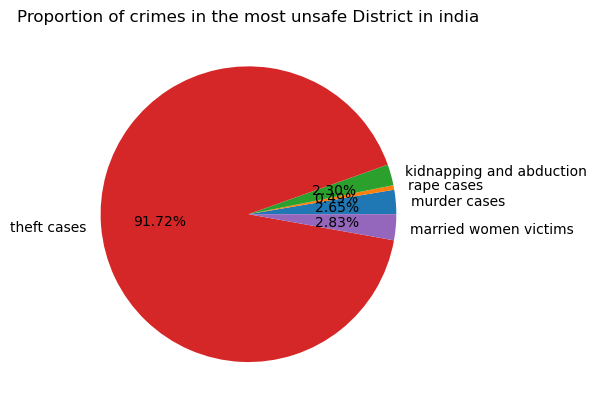

In [64]:
prop_dangerous = dt[['murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases','married women victims']].sum()

plt.pie(x= prop_dangerous.values , labels = prop_dangerous.index , autopct='%0.2f%%')
plt.title('Proportion of crimes in the most unsafe District in india')
plt.show()

#### Theft crimes dominates the vast majority of crimes in BANGALORE COMMR in the last decade

## The most safe area in india 

In [65]:
peaceful_areas

,STATE/UT,DISTRICT,YEAR,HURT/GREVIOUS HURT,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,murder cases,rape cases,kidnapping and abduction,theft cases,riot cases,cheating cases,married women victims,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,1131,0,181,1518,178,100,92,646,108,121,374,4449
1,ANDHRA PRADESH,ANANTAPUR,2001,1543,0,270,754,277,46,106,947,237,84,303,4567
2,ANDHRA PRADESH,CHITTOOR,2001,2088,0,404,1262,160,54,118,1701,194,251,395,6627
3,ANDHRA PRADESH,CUDDAPAH,2001,795,0,233,1181,134,40,50,449,187,51,238,3358
4,ANDHRA PRADESH,EAST GODAVARI,2001,1244,0,431,2313,150,46,98,2508,111,273,426,7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,DELHI UT,SOUTH-WEST,2012,131,0,4,1387,101,174,798,2601,12,219,315,5742
9010,DELHI UT,STF,2012,0,0,0,1,1,0,0,0,0,4,0,6
9012,LAKSHADWEEP,LAKSHADWEEP,2012,3,0,0,32,0,0,0,17,13,0,2,67
9014,PUDUCHERRY,KARAIKAL,2012,186,0,44,392,13,12,4,187,18,17,3,876


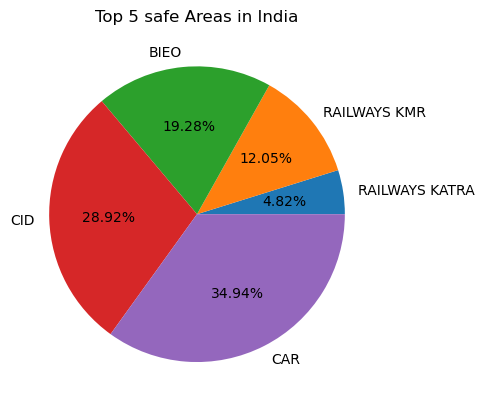

In [69]:
dt = peaceful_areas.groupby('DISTRICT')['Total Crimes'].sum().sort_values(ascending=True).reset_index()[:5]
plt.pie(x=dt['Total Crimes'] , labels = dt['DISTRICT'].unique() , autopct='%0.2f%%' , data=dt)
plt.title('Top 5 safe Areas in India')
plt.show()

### District CAR in state A & N ISLANDS is the most safe area in india in the last decade 

In [71]:
dt1 = peaceful_areas.loc[peaceful_areas['DISTRICT'] == 'CAR']

prop_safe = dt1[['murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases','married women victims']].sum()
prop_safe

murder cases                2
rape cases                  0
kidnapping and abduction    2
theft cases                 9
married women victims       1
dtype: int64

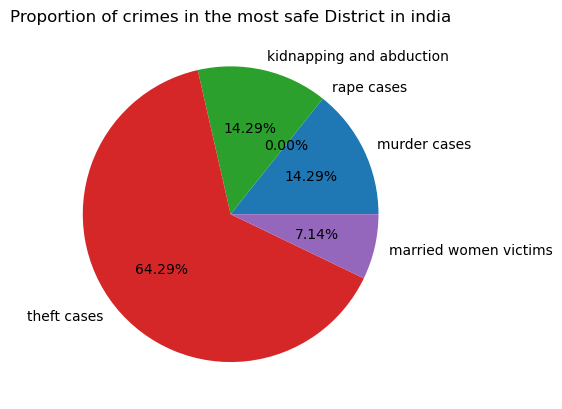

In [67]:
dt1 = peaceful_areas.loc[peaceful_areas['DISTRICT'] == 'CAR']

prop_safe = dt1[['murder cases',
       'rape cases', 'kidnapping and abduction', 'theft cases','married women victims']].sum()

plt.pie(x= prop_safe.values , labels = prop_safe.index , autopct='%0.2f%%')
plt.title('Proportion of crimes in the most safe District in india')
plt.show()

#### despite of being the most safe area in india in the last decade but theft crimes occured more than any other crimes in CAR which indicates the widespread theft crimes in india even in the safest places  